In [1]:
import pandas as pd
import numpy as np              
import statsmodels.api as sm    
import seaborn as sns           
import matplotlib.pyplot as plt 

In [2]:
satisfaction = pd.read_csv('Satisfaction survay.csv')

In [3]:
satisfaction.shape

(4410, 29)

In [4]:
satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
satisfaction.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [6]:
satisfaction.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [7]:
median_num_companies_worked = satisfaction['NumCompaniesWorked'].median()
median_total_working_years = satisfaction['TotalWorkingYears'].median()
median_environment_satisfaction = satisfaction['EnvironmentSatisfaction'].median()
median_job_satisfaction = satisfaction['JobSatisfaction'].median()
median_work_life_balance = satisfaction['WorkLifeBalance'].median()

In [8]:
satisfaction['NumCompaniesWorked'].fillna(median_num_companies_worked, inplace=True)
satisfaction['TotalWorkingYears'].fillna(median_total_working_years, inplace=True)
satisfaction['EnvironmentSatisfaction'].fillna(median_environment_satisfaction, inplace=True)
satisfaction['JobSatisfaction'].fillna(median_job_satisfaction, inplace=True)
satisfaction['WorkLifeBalance'].fillna(median_work_life_balance, inplace=True)


In [9]:
satisfaction.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

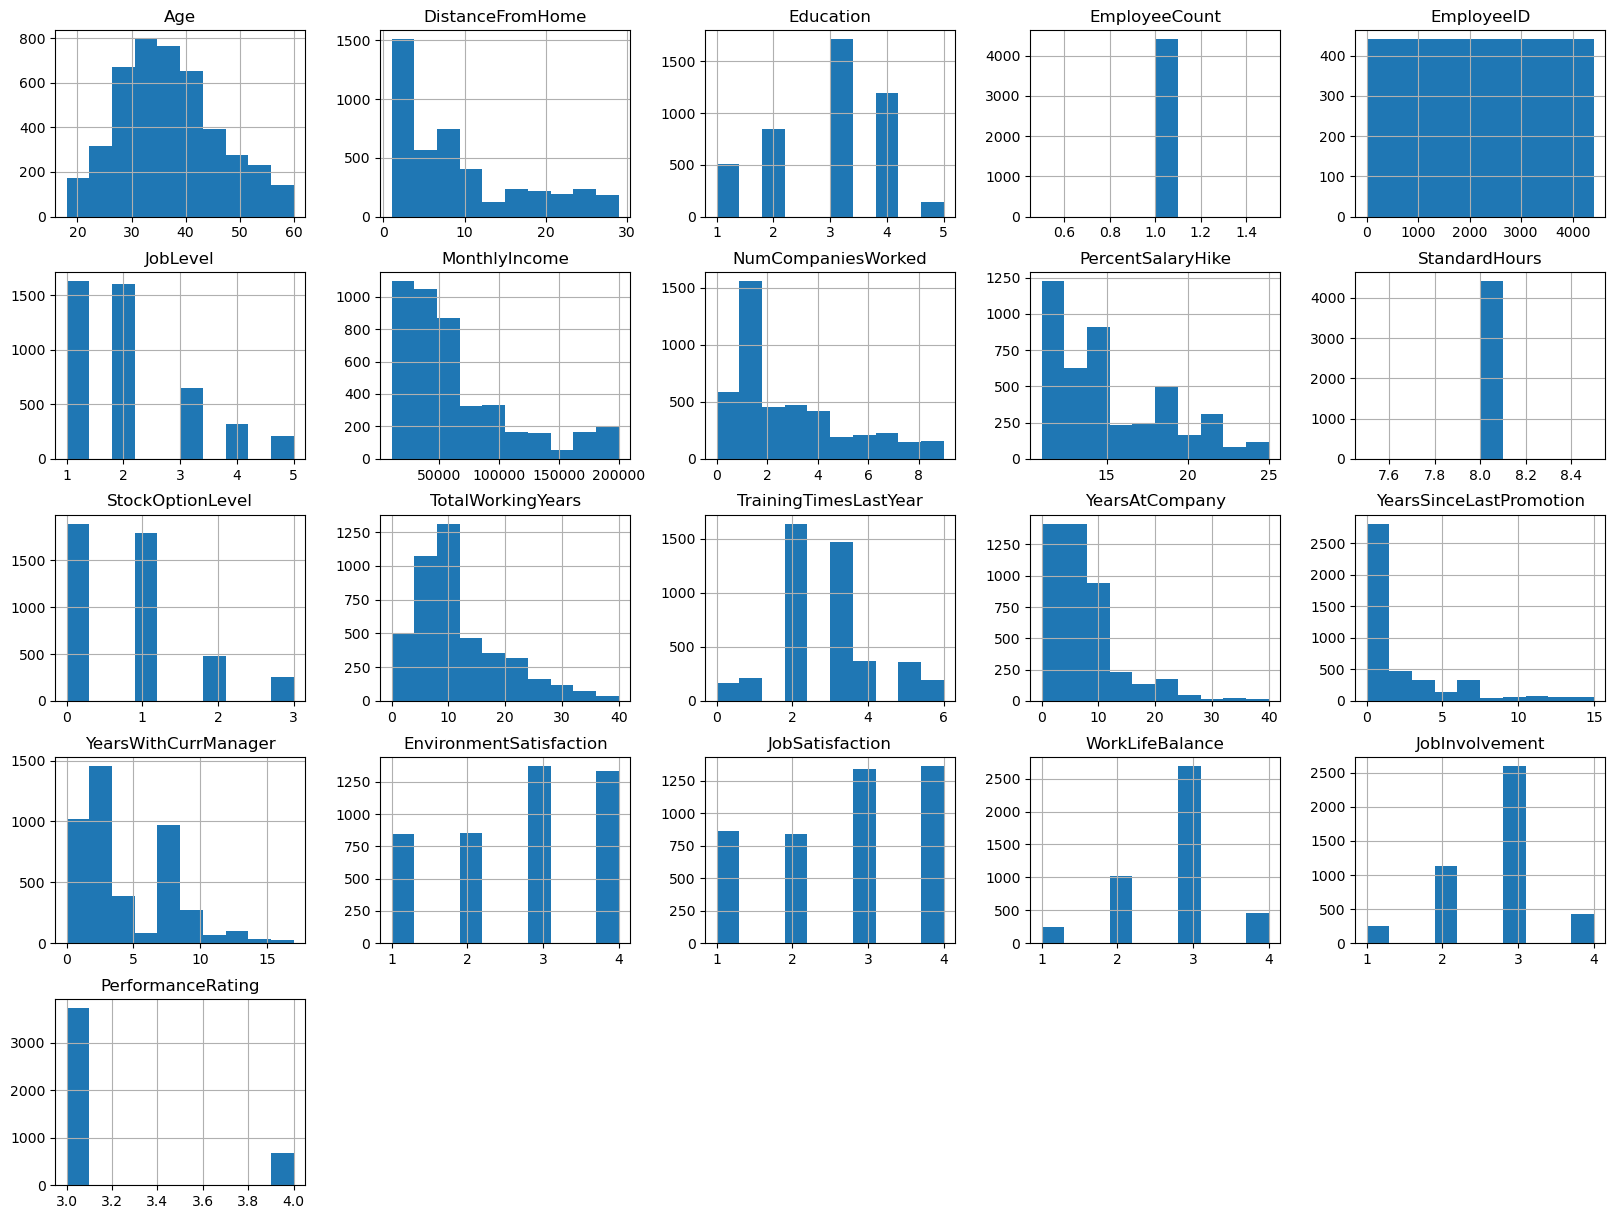

In [10]:
satisfaction.hist(bins=10, figsize=(20,15));

# statistical data summary

In [11]:
satisfaction.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.691837,15.209524,8.0,...,11.277324,2.799320,7.008163,2.187755,4.123129,2.725170,2.729478,2.763492,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.493912,3.659108,0.0,...,7.774490,1.288978,6.125135,3.221699,3.567327,1.089852,1.098904,0.703541,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


# Feature Analysis

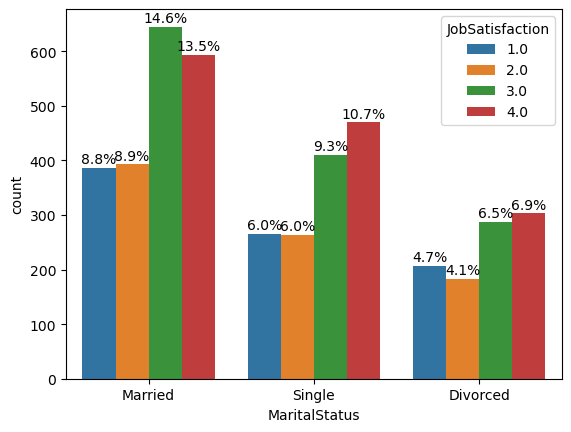

In [12]:
# Create the countplot
ax = sns.countplot(x='MaritalStatus', hue='JobSatisfaction', data=satisfaction)

# the percentage of satisfaction for each bin
total_counts = len(satisfaction['MaritalStatus'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 8, f'{height/total_counts:.1%}', ha="center")

plt.show()


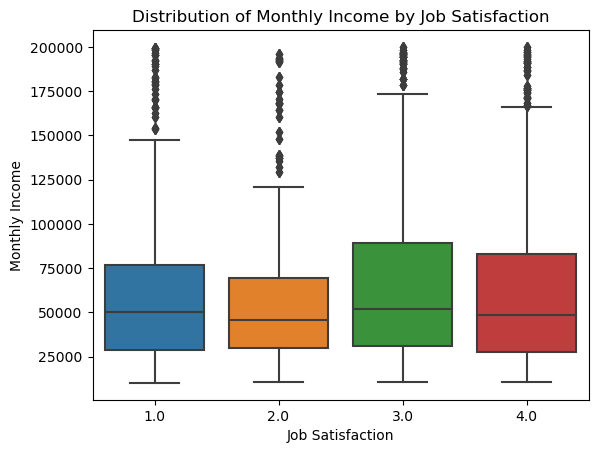

In [13]:
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=satisfaction)
plt.xlabel('Job Satisfaction')
plt.ylabel('Monthly Income')
plt.title('Distribution of Monthly Income by Job Satisfaction')
plt.show()


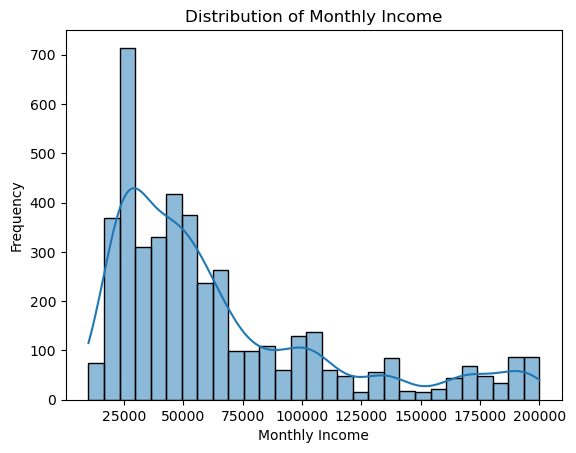

In [14]:
sns.histplot(data=satisfaction, x='MonthlyIncome', kde=True)
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Income')
plt.show()


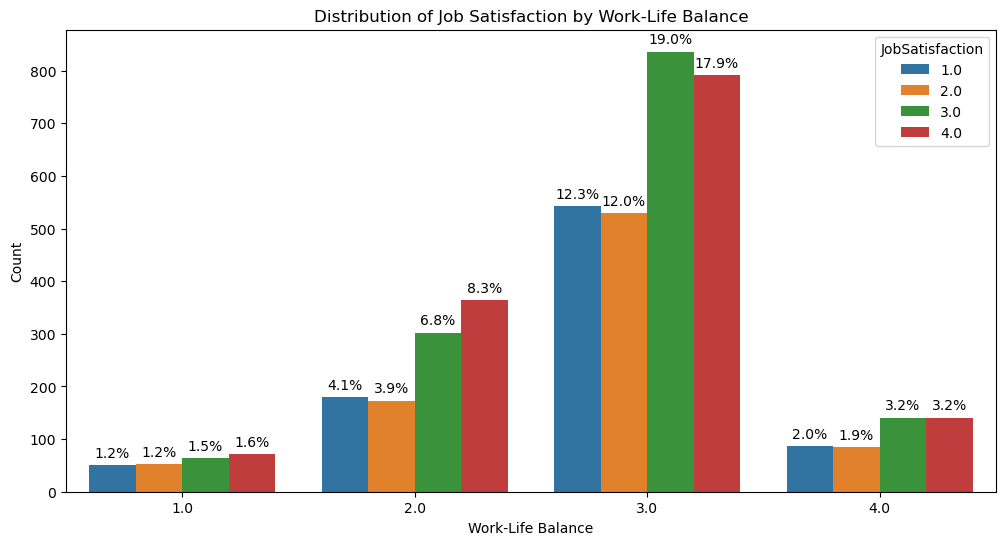

In [15]:
plt.figure(figsize=(12, 6))

# Create the countplot
ax = sns.countplot(x='WorkLifeBalance', hue='JobSatisfaction', data=satisfaction)

total_counts = len(satisfaction['WorkLifeBalance'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 15, f'{height/total_counts:.1%}', ha="center")

plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction by Work-Life Balance')

plt.show()



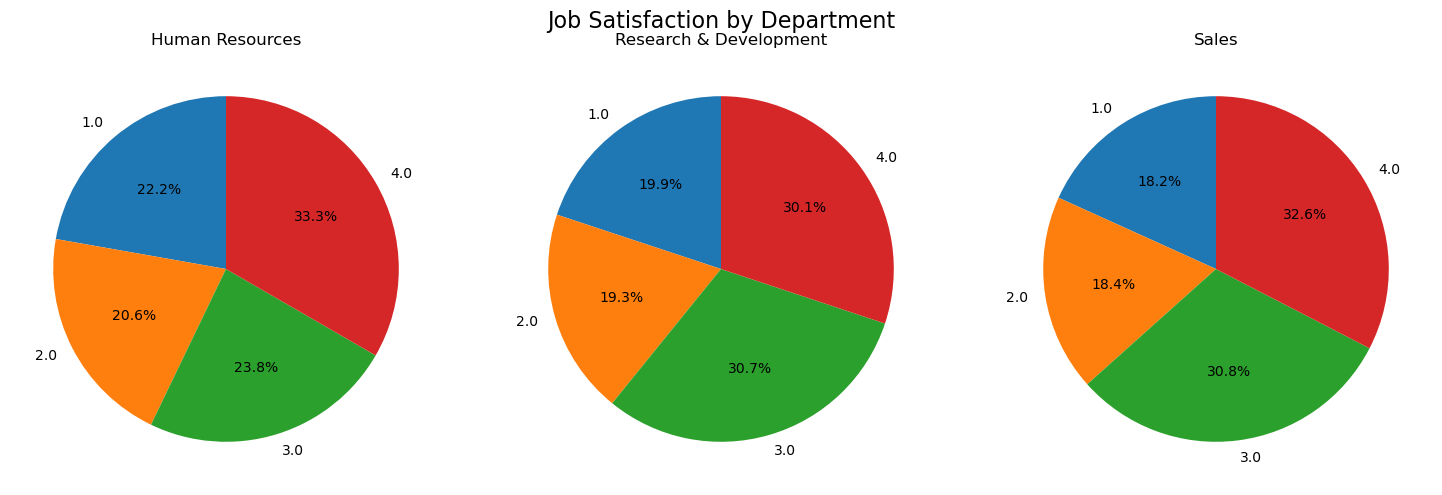

In [16]:
department_job_satisfaction_counts = satisfaction.groupby(['Department', 'JobSatisfaction']).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=1, ncols=len(department_job_satisfaction_counts), figsize=(15, 5))

for i, (department, counts) in enumerate(department_job_satisfaction_counts.iterrows()):
    ax = axes[i]
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(department)
    
plt.suptitle('Job Satisfaction by Department', fontsize=16)


plt.tight_layout()
plt.show()



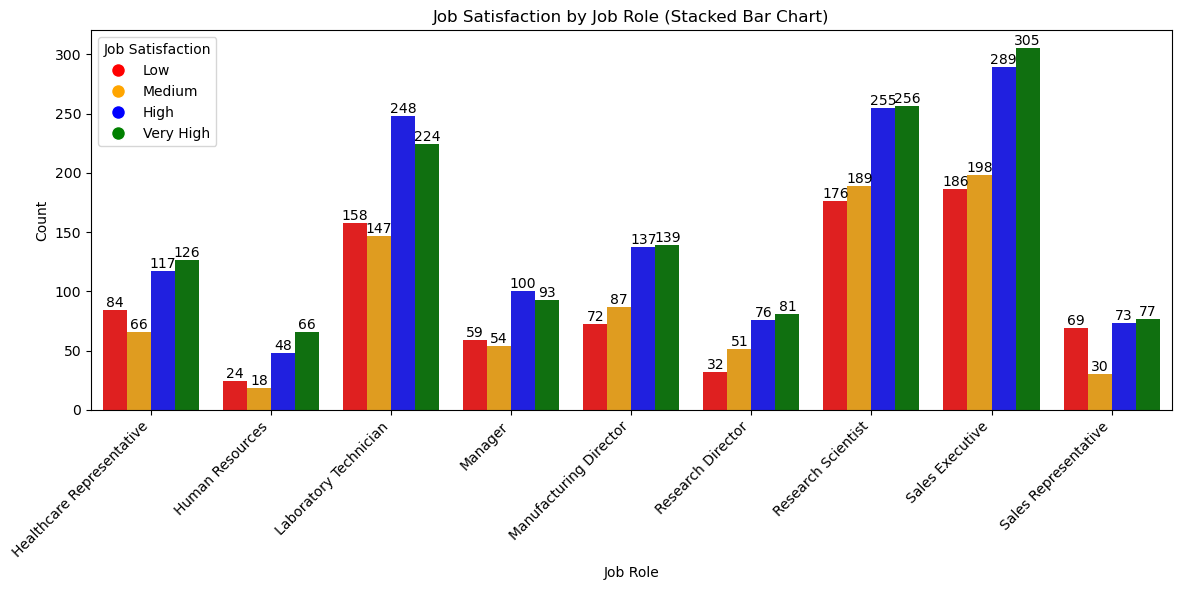

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stacked bar chart
plt.figure(figsize=(12, 6))

job_satisfaction_counts = satisfaction.groupby(['JobRole', 'JobSatisfaction']).size().reset_index(name='count')

legend_labels = {
    'Low': 'red',
    'Medium': 'orange',
    'High': 'blue',
    'Very High': 'green'
}

sns.barplot(x='JobRole', y='count', hue='JobSatisfaction', data=job_satisfaction_counts, palette=legend_labels.values())

plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Job Satisfaction by Job Role (Stacked Bar Chart)')

plt.xticks(rotation=45, ha='right')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha="center", va="bottom")

custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in legend_labels.items()]
plt.legend(handles=custom_legend, title='Job Satisfaction', loc='upper left')

plt.tight_layout()
plt.show()


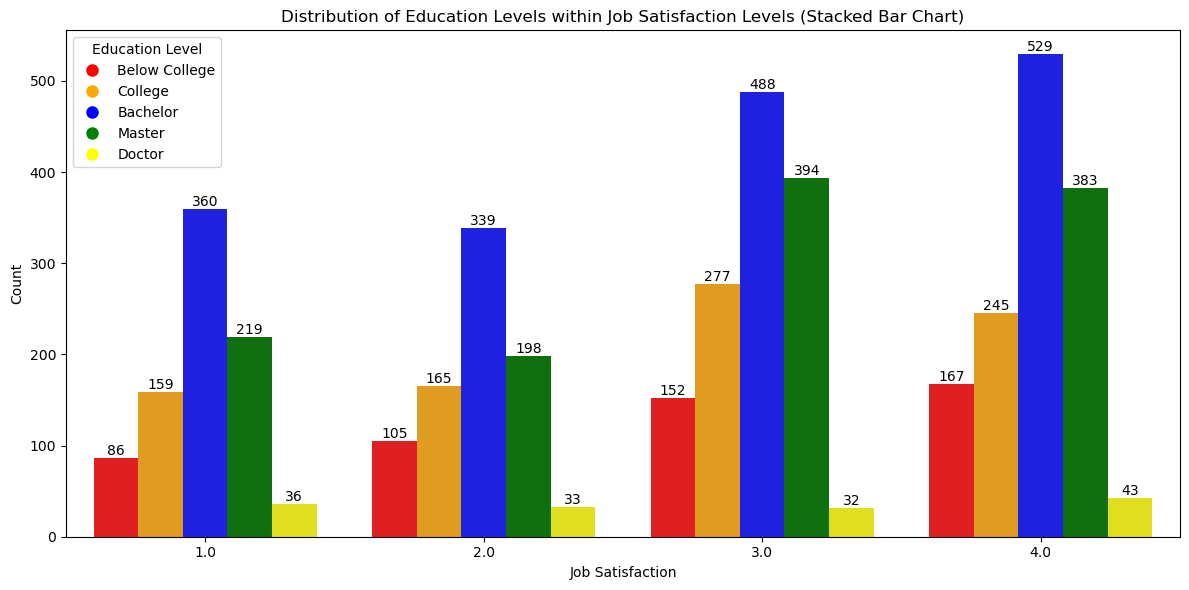

In [18]:
plt.figure(figsize=(12, 6))

education_job_satisfaction_counts = satisfaction.groupby(['JobSatisfaction', 'Education']).size().reset_index(name='count')

colors = {
    'Below College': 'red',
    'College': 'orange',
    'Bachelor': 'blue',
    'Master': 'green',
    'Doctor': 'yellow'
}

sns.barplot(x='JobSatisfaction', y='count', hue='Education', data=education_job_satisfaction_counts, palette=colors.values())

plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Education Levels within Job Satisfaction Levels (Stacked Bar Chart)')

legend_labels = list(colors.keys())
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in colors.items()]
plt.legend(handles=custom_legend, title='Education Level', loc='upper left', labels=legend_labels)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha="center", va="bottom")

plt.tight_layout()
plt.show()



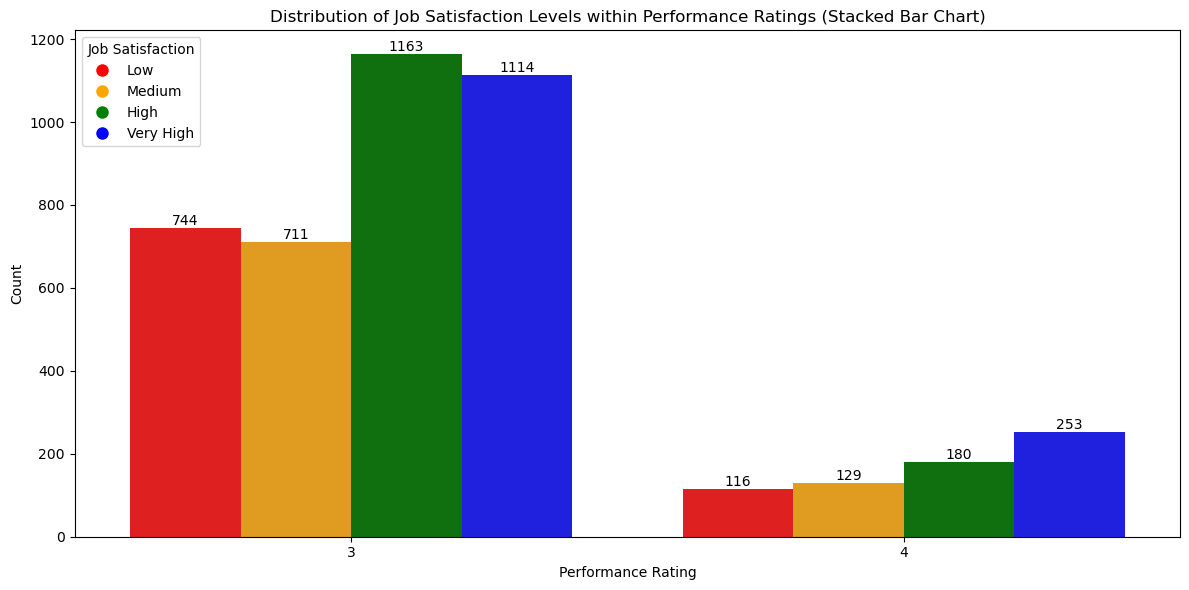

In [19]:
plt.figure(figsize=(12, 6))

performance_satisfaction_counts = satisfaction.groupby(['PerformanceRating', 'JobSatisfaction']).size().reset_index(name='count')

colors = {
    'Low': 'red',
    'Medium': 'orange',
    'High': 'green',
    'Very High': 'blue'
}

sns.barplot(x='PerformanceRating', y='count', hue='JobSatisfaction', data=performance_satisfaction_counts, palette=colors.values())

plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction Levels within Performance Ratings (Stacked Bar Chart)')

legend_labels = list(colors.keys())
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in colors.items()]
plt.legend(handles=custom_legend, title='Job Satisfaction', loc='upper left', labels=legend_labels)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha="center", va="bottom")

plt.tight_layout()
plt.show()


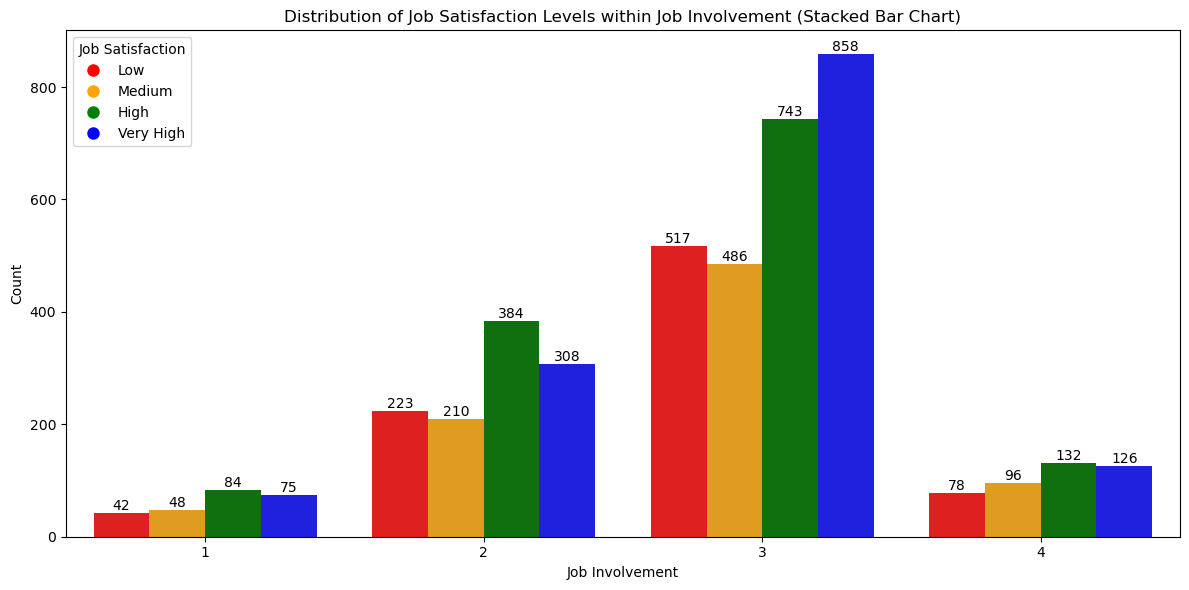

In [20]:
plt.figure(figsize=(12, 6))

involvement_satisfaction_counts = satisfaction.groupby(['JobInvolvement', 'JobSatisfaction']).size().reset_index(name='count')

colors = {
    'Low': 'red',
    'Medium': 'orange',
    'High': 'green',
    'Very High': 'blue'
}

sns.barplot(x='JobInvolvement', y='count', hue='JobSatisfaction', data=involvement_satisfaction_counts, palette=colors.values())

plt.xlabel('Job Involvement')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction Levels within Job Involvement (Stacked Bar Chart)')

legend_labels = list(colors.keys())
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in colors.items()]
plt.legend(handles=custom_legend, title='Job Satisfaction', loc='upper left', labels=legend_labels)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha="center", va="bottom")

plt.tight_layout()
plt.show()


# Data Processing

In [21]:
list(satisfaction.select_dtypes(object))

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18']

In [22]:
list(satisfaction.select_dtypes( float))

['NumCompaniesWorked',
 'TotalWorkingYears',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance']

In [23]:
# Convert float columns to integers
float_to_int_columns = ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

for column in float_to_int_columns:
    satisfaction[column] = satisfaction[column].astype(int)


In [24]:
#label encoding coding
categorical_columns = satisfaction.select_dtypes(include=['object']).columns.tolist()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    satisfaction[column] = label_encoder.fit_transform(satisfaction[column])


In [25]:
satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      4410 non-null   int64
 1   Attrition                4410 non-null   int32
 2   BusinessTravel           4410 non-null   int32
 3   Department               4410 non-null   int32
 4   DistanceFromHome         4410 non-null   int64
 5   Education                4410 non-null   int64
 6   EducationField           4410 non-null   int32
 7   EmployeeCount            4410 non-null   int64
 8   EmployeeID               4410 non-null   int64
 9   Gender                   4410 non-null   int32
 10  JobLevel                 4410 non-null   int64
 11  JobRole                  4410 non-null   int32
 12  MaritalStatus            4410 non-null   int32
 13  MonthlyIncome            4410 non-null   int64
 14  NumCompaniesWorked       4410 non-null   int32
 15  Over

### scaling

In [26]:
from sklearn.preprocessing import StandardScaler

# Define the columns you want to scale (numerical columns)
columns_to_scale = ['Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 
                    'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 
                    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                    'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
satisfaction[columns_to_scale] = scaler.fit_transform(satisfaction[columns_to_scale])

satisfaction.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1.541369,0,2,2,-0.393938,-0.891688,1,1,1,0,...,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,3,4,2,3,3
1,-0.648668,1,1,1,0.099639,-1.868426,1,1,2,0,...,-0.678877,0.155707,-0.327893,-0.368715,-0.034520,3,2,4,2,4
2,-0.539166,0,1,1,0.963398,1.061787,4,1,3,1,...,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,2,2,1,3,3
3,0.117845,0,0,1,-0.887515,2.038524,1,1,4,1,...,0.221606,1.707500,0.161947,1.493867,0.245834,4,4,3,2,3
4,-0.539166,0,2,1,0.099639,-1.868426,3,1,5,1,...,-0.292956,-0.620189,-0.164613,-0.679146,-0.034520,4,1,3,3,3


In [27]:
satisfaction = satisfaction.drop(['StandardHours', 'EmployeeCount','Over18'], axis=1)

print(satisfaction.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')


## Correlation analysis

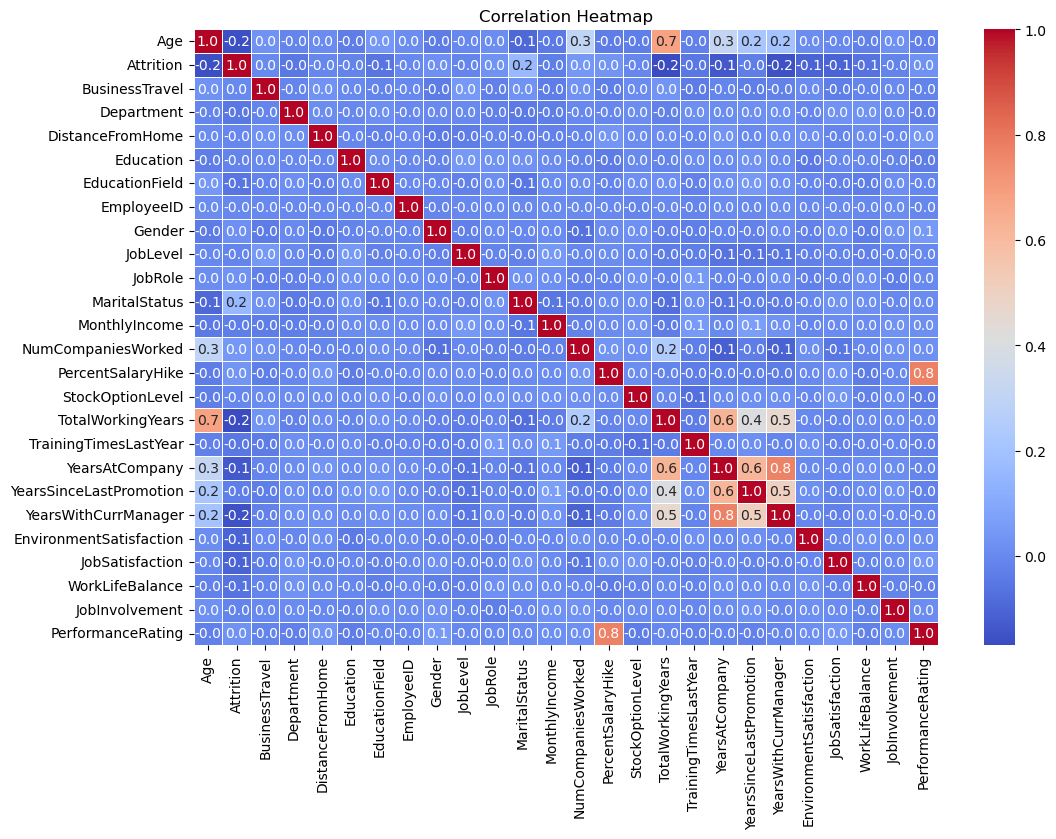

Correlations with 'JobSatisfaction' (excluding 'JobSatisfaction'):
PerformanceRating          0.043147
StockOptionLevel           0.039757
PercentSalaryHike          0.030626
Department                 0.028487
MaritalStatus              0.023766
Gender                     0.015923
MonthlyIncome              0.004716
JobInvolvement             0.004006
EmployeeID                -0.001024
YearsAtCompany            -0.002098
Age                       -0.003003
Education                 -0.004612
EnvironmentSatisfaction   -0.006036
DistanceFromHome          -0.011213
YearsSinceLastPromotion   -0.016081
TotalWorkingYears         -0.016703
WorkLifeBalance           -0.018527
JobLevel                  -0.018596
JobRole                   -0.019036
TrainingTimesLastYear     -0.021522
EducationField            -0.023661
YearsWithCurrManager      -0.024653
BusinessTravel            -0.032038
NumCompaniesWorked        -0.055585
Attrition                 -0.103068
Name: JobSatisfaction, dtype: flo

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = satisfaction.corr()

# Sort the correlations with 'JobSatisfaction' in descending order (excluding 'JobSatisfaction' itself)
sorted_corr_with_job_satisfaction = correlation_matrix['JobSatisfaction'].drop('JobSatisfaction').sort_values(ascending=False)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()

# Display the sorted correlations with 'JobSatisfaction'
print("Correlations with 'JobSatisfaction' (excluding 'JobSatisfaction'):")
print(sorted_corr_with_job_satisfaction)


## Machine Learning

In [29]:
#Define variables
# dependent variable (target variable)
y = satisfaction['JobSatisfaction']

#independent variables (predictor variables)
X = satisfaction[['Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'NumCompaniesWorked',
                  'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]


### split the data to train-set and test-set 

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Linear Regression:

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print("Mean Squared Error:", lr_mse)
print("Mean Absolute Error:", lr_mae)
print("R-squared:", lr_r2)

Linear Regression:
Mean Squared Error: 1.2049545343408166
Mean Absolute Error: 0.9432599313575234
R-squared: -0.00025841093345335686


Decision Tree Regression:

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

dt_mse = mean_squared_error(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression:")
print("Mean Squared Error:", dt_mse)
print("Mean Absolute Error:", dt_mae)
print("R-squared:", dt_r2)


Decision Tree Regression:
Mean Squared Error: 0.3550642479213908
Mean Absolute Error: 0.16061980347694632
R-squared: 0.7052536089260629


Random Forest Regression:

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R-squared:", rf_r2)


Random Forest Regression:
Mean Squared Error: 0.23258322310887697
Mean Absolute Error: 0.3262211154302991
R-squared: 0.8069277150909796


Support Vector Regression (SVR):

In [34]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = SVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

svr_mse = mean_squared_error(y_test, y_pred)
svr_mae = mean_absolute_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

print("Support Vector Regression (SVR):")
print("Mean Squared Error:", svr_mse)
print("Mean Absolute Error:", svr_mae)
print("R-squared:", svr_r2)


Support Vector Regression (SVR):
Mean Squared Error: 1.016960370356542
Mean Absolute Error: 0.7921438712734696
R-squared: 0.15579954675085406


Gradient Boosting Regressor:

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred)
gb_mae = mean_absolute_error(y_test, y_pred)
gb_r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor:")
print("Mean Squared Error:", gb_mse)
print("Mean Absolute Error:", gb_mae)
print("R-squared:", gb_r2)


Gradient Boosting Regressor:
Mean Squared Error: 1.0182288027477076
Mean Absolute Error: 0.8629666567966598
R-squared: 0.15474659401960622


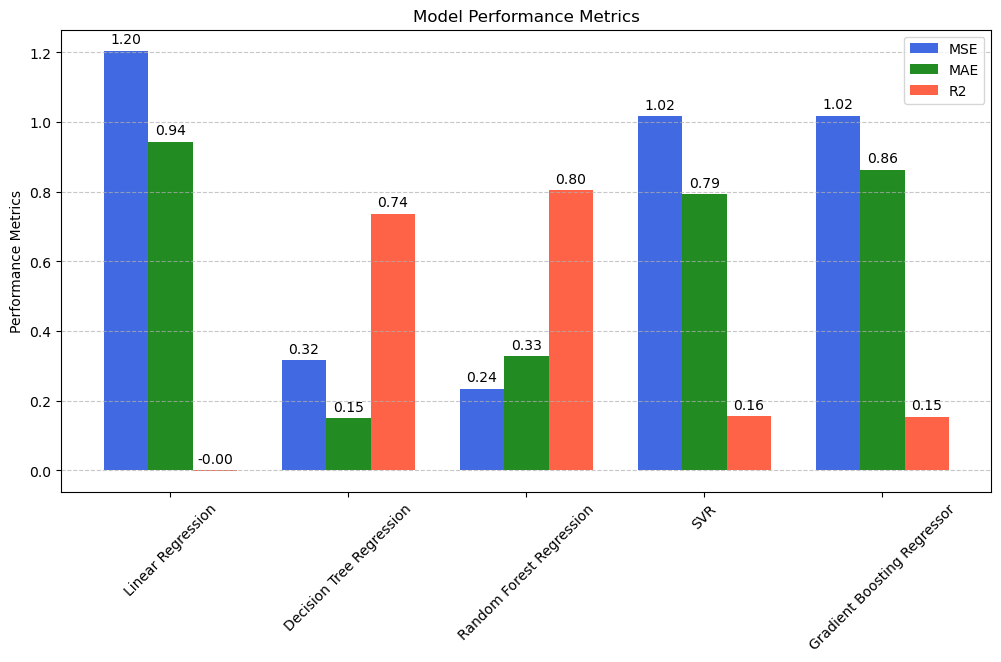

In [36]:
import matplotlib.pyplot as plt
import numpy as np

models = ["Linear Regression", "Decision Tree Regression", "Random Forest Regression", "SVR", "Gradient Boosting Regressor"]

mse_values = [1.2049545343408166, 0.31651549508692367, 0.23518879427124845, 1.0169603703565417, 1.0180295286807561]
mae_values = [0.9432599313575234, 0.15079365079365079, 0.32760360652197384, 0.7921438712734694, 0.8628828971179676]
r2_values = [-0.00025841093345335686, 0.7372537493087575, 0.8047647749997392, 0.15579954675085417, 0.15491201566487856]

num_models = len(models)
ind = np.arange(num_models) 
width = 0.25


fig, ax = plt.subplots(figsize=(12, 6))

mse_bars = ax.bar(ind - width, mse_values, width, label='MSE', color='royalblue')
ax.set_ylabel('Performance Metrics')
ax.set_title('Model Performance Metrics')
ax.set_xticks(ind)
ax.set_xticklabels(models, rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)


mae_bars = ax.bar(ind, mae_values, width, label='MAE', color='forestgreen')

r2_bars = ax.bar(ind + width, r2_values, width, label='R2', color='tomato')

def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.2f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(mse_bars)
annotate_bars(mae_bars)
annotate_bars(r2_bars)

ax.legend()

plt.show()
